In [88]:
import numpy as np 
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=1,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=41,
    hypercube=False,
    class_sep=10
)

print("Format of X array:")
print("Shape:", X.shape)
print("Data type:", X.dtype)

print("\nFormat of y array:")
print("Shape:", y.shape)
print("Data type:", y.dtype)

Format of X array:
Shape: (100, 2)
Data type: float64

Format of y array:
Shape: (100,)
Data type: int64


In [89]:
import matplotlib.pyplot as plt
%matplotlib inline

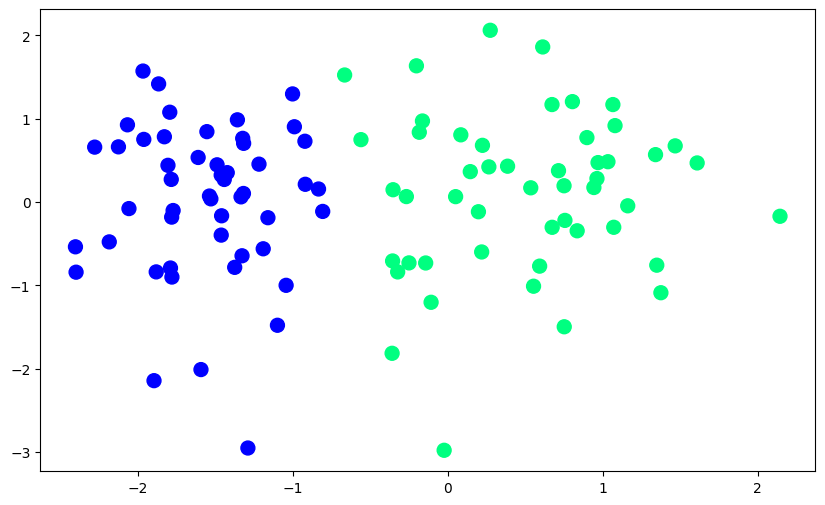

In [90]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [91]:
def step(z):
    return 1 if z > 0 else 0

In [92]:
def perceptron(X, y):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0, 100)
        y_hat = step(np.dot(X[j], weights))
        weights = weights + lr * (y[j] - y_hat) * X[j]
        
    return weights[0], weights[1:]

In [93]:
intercept_, coef_ = perceptron(X, y)

In [94]:
print(coef_)
print(intercept_)

[1.32630871 0.03556124]
0.9


In [95]:
m = -(coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])

In [96]:
x_input = np.linspace(-3, 3, 100)
y_input = m * x_input + b

(-3.0, 2.0)

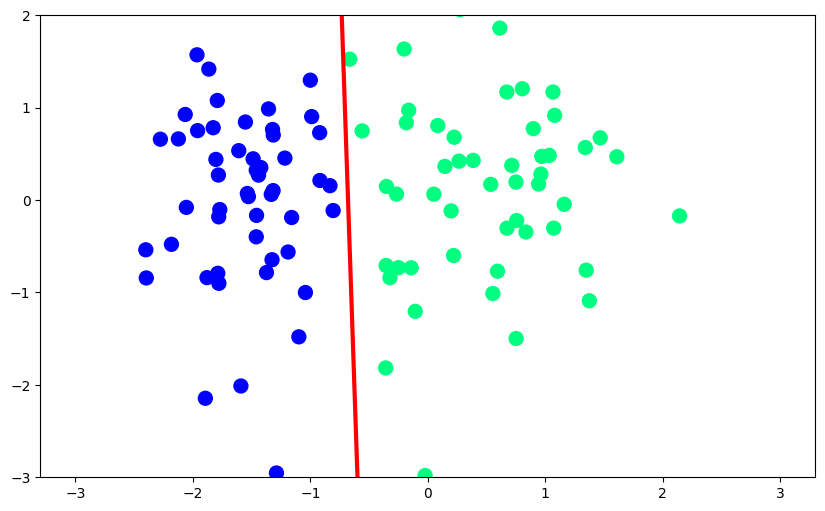

In [97]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color='red', linewidth=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.ylim(-3, 2)

In [98]:
def perceptron(X, y):
    m = []
    b = []
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0, 100)
        y_hat = step(np.dot(X[j], weights))
        weights = weights + lr * (y[j] - y_hat) * X[j]
        
        m.append(-(weights[1] / weights[2]))
        b.append(-(weights[0] / weights[2]))
        
    return m, b

In [99]:
m, b = perceptron(X, y)

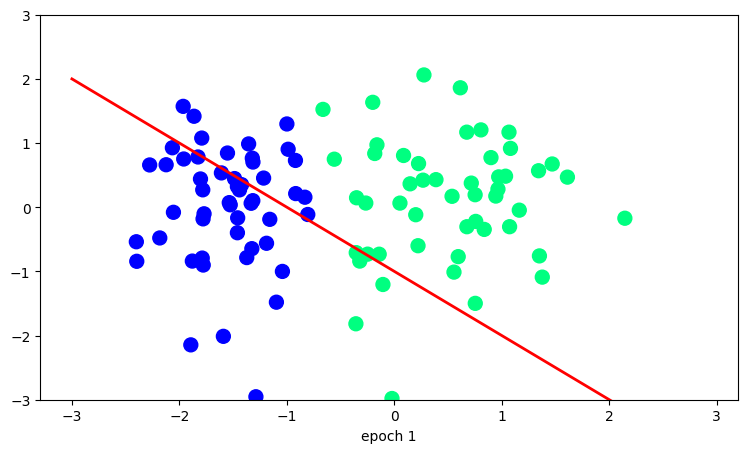

In [100]:
fig, ax = plt.subplots(figsize=(9, 5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i * m[0] + b[0]
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
line, = ax.plot(x_i, x_i * m[0] + b[0], 'r-', linewidth=2)
plt.ylim(-3, 3)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i * m[i] + b[i])
    ax.set_xlabel(label)

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

In [101]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X, y)

LogisticRegression()

In [102]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [103]:
x_input1 = np.linspace(-3, 3, 100)
y_input1 = m * x_input + b

(-3.0, 2.0)

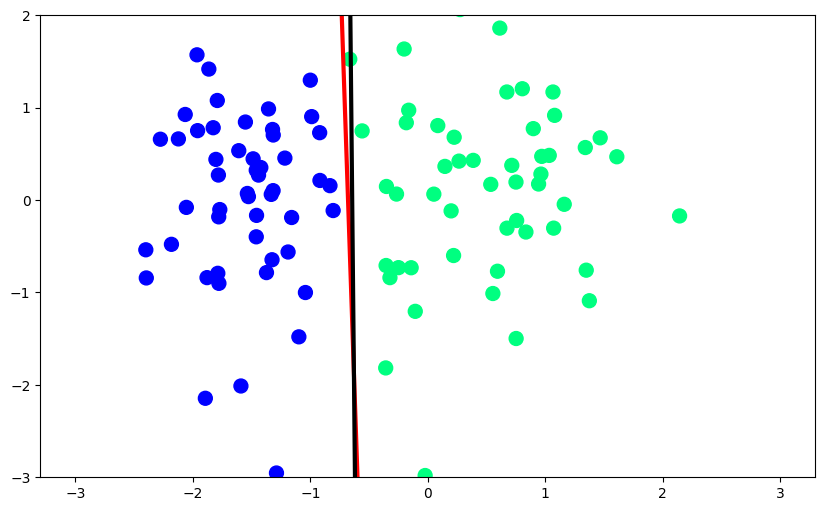

In [104]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)